# Code to make Figure 14
- Decadal map composites over southern Ross Sea for ocean variables
- Notebook by Alice DuVivier (NCAR)
- June 2023

In [1]:
import pandas as pd
from minisom import MiniSom, asymptotic_decay
import xarray as xr
import cftime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cls
from itertools import product
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from datetime import timedelta
from itertools import product
import dask
import utils
import cmocean
import geopandas as gpd

In [2]:
# set the location of the already extracted training data
path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/Ross_analysis_v5/'
path_out = path_in+'figure_code/final_figures/'
# set shape files info
fname= '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/Ross_analysis_v4/USNIC_ANTARC_shelf_2022/USNIC_ANTARC_shelf_2022.shp' 

### Specify variables to plot

In [11]:
# set path to the pulled data from Anna-Lena
data_path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/DATA/ocean_analysis/'


In [4]:
# file name for training variable only here 
fin1 = 'mean_HFLX_HMXL_1980s_septembers'
fin2 = 'mean_HFLX_HMXL_2070s_septembers'

In [5]:
# load data
ds1 = xr.open_mfdataset(data_path_in+fin1+'.nc')
ds2 = xr.open_mfdataset(data_path_in+fin2+'.nc')

In [6]:
# keep just the region of interest
data1 = ds1.HFL_HMXL_1980s.where((ds1.TLONG > 140.0) & (ds1.TLONG < 230.0) & (ds1.TLAT < -68.0))
data2 = ds2.HFL_HMXL_2070s.where((ds2.TLONG > 140.0) & (ds2.TLONG < 230.0) & (ds2.TLAT < -68.0))

## Plot the decadal winter means and differences

In [7]:
# Set plotting limits
lat_max = -72
lat_min = -80
lon_max = 200
lon_min = 160
lon_avg = 190

In [8]:
#set shape files info
shdf = gpd.read_file(fname)
# This line is important. Here we convert the projection from the shapefile one to the cartopy one 
shdf = shdf.to_crs(ccrs.SouthPolarStereo())

# Shapefile projection conversion
shdf = gpd.read_file(fname)
shdf = shdf.to_crs(ccrs.SouthPolarStereo(central_longitude=lon_avg))

In [9]:
# set some labeling things
var_in = 'HFLX_HMXL'

if var_in == 'HFLX_HMXL':
    fout = path_out+'fig_14_decadal_'+var_in
    units = '(W/m$^{2}$)'
    title_in = 'Heat flux through the mixed layer\n'
    levels_in = np.arange(-200,225,25)
    ticks_in = [-200,-150,-100,-50,0,50,100,150,200]
    cmap_in = cmocean.cm.curl
    levels_diff = np.arange(-80,100,20)
    ticks_diff = [-80,-60,-40,-20,0,20,40,60,80]
    cmap_diff = cmocean.cm.diff
    ext = 'both'
    # prefixes
    pref_1 = 'd) '
    pref_2 = 'e) '
    pref_3 = 'f) ' 
    

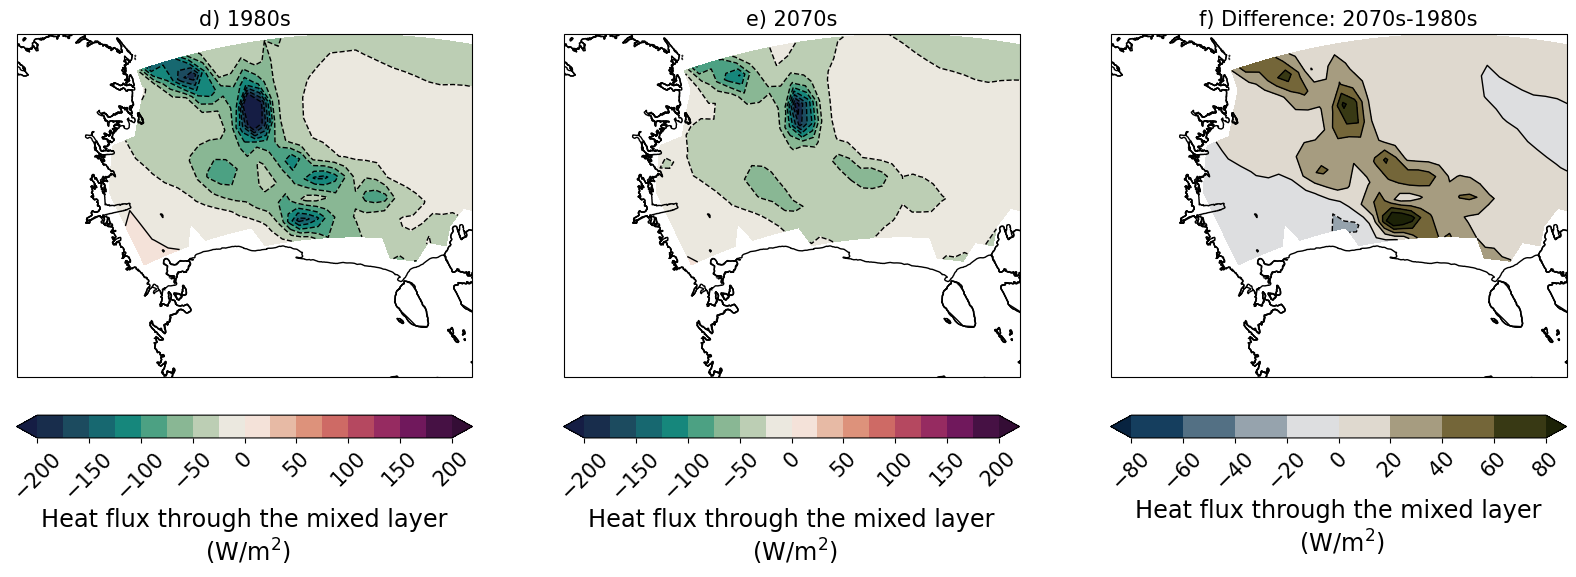

In [10]:
## 2070's difference figure
tag = '2070'

# select data
data_ctrl = ds1.HFL_HMXL_1980s
data_in = ds2.HFL_HMXL_2070s
data_diff = data_in - data_ctrl

# create figure
fig = plt.figure(figsize=(20,10))

# get lats/lons for plotting
lons = ds1.TLONG
lats = ds1.TLAT

# plot the subplots - note it's nrow x ncol x index (starting upper left)
### mean over 1980s
ax = fig.add_subplot(1,3,1, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg) )
this = ax.contourf(lons,lats,
                   data_ctrl,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend=ext)
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15,rotation=45)
cbar.set_label(title_in+' '+units, fontsize='xx-large')
# overlay contours
this2 = ax.contour(lons,lats,
                   data_ctrl,
                   transform=ccrs.PlateCarree(),
                   colors = 'black', levels = levels_in,linewidths=1)
#plt.clabel(this2,colors = 'black', inline=1,fontsize=10,levels=levels_in)
# set final plot details
ax.set_extent([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
plt.title(pref_1+'1980s',fontsize=15)

### mean future
ax = fig.add_subplot(1,3,2, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg) )
this = ax.contourf(lons,lats,
                   data_in,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend=ext)
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15,rotation=45)
cbar.set_label(title_in+' '+units, fontsize='xx-large')
# overlay contours
this2 = ax.contour(lons,lats,
                   data_in,
                   transform=ccrs.PlateCarree(),
                   colors = 'black', levels = levels_in,linewidths=1)
#plt.clabel(this2,colors = 'black', inline=1,fontsize=10,levels=levels_in)
# set final plot details
ax.set_extent([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
plt.title(pref_2+tag+'s',fontsize=15)

### diff
ax = fig.add_subplot(1,3,3, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg) )
this = ax.contourf(lons,lats,
                     data_diff,
                     transform=ccrs.PlateCarree(),
                     cmap = cmap_diff,
                     levels=levels_diff, extend='both')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_diff,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15,rotation=45)
cbar.set_label(title_in+' '+units, fontsize='xx-large')
# overlay contours
this2 = ax.contour(lons,lats,
                   data_diff,
                   transform=ccrs.PlateCarree(),
                   colors = 'black', levels = levels_diff,linewidths=1)
#plt.clabel(this2,colors = 'black', inline=1,fontsize=10,levels=levels_diff)
# set final plot details
ax.set_extent([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
plt.title(pref_3+'Difference: '+tag+'s-1980s',fontsize=15)

# Finalize figure and save
fig = plt.savefig(fout+'.png', bbox_inches='tight', dpi=200)